# 目标检测和边界框

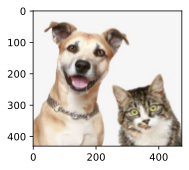

In [1]:
# 下面两行是防止内核挂掉加的
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline
import torch
from d2l import torch as d2l

d2l.set_figsize()
img = d2l.plt.imread('..\data\dog_and_cat.jpg')
d2l.plt.imshow(img);

定义在这两种表示之间进行转换的函数:(两种表示就是：（1）给出左上和右下的坐标；（2）给出左上和高宽)

In [2]:
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3] # 左上右下的坐标
    cx = (x1 + x2) / 2 # 中间点的x坐标
    cy = (y1 + y2) / 2 # 中间点的y坐标
    w = x2 - x1 # 宽
    h = y2 - y1 # 高
    boxes = torch.stack((cx, cy, w, h), axis=-1) # 沿着最后的维数串联张量序列
    return boxes

def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3] # 中间高宽坐标
    # 下面是左上到右下的坐标
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1) # 沿着最后的维数串联张量序列
    return boxes

定义图像中狗和猫的边界框

In [27]:
dog_bbox, cat_bbox = [50.0, 40.0, 250.0, 416.0], [270.0, 192.0, 455.0, 416.0] # 这个是左上右下的表示

boxes = torch.tensor((dog_bbox, cat_bbox)) # 转换成：中间高宽表示
box_center_to_corner(box_corner_to_center(boxes)) == boxes # 再转回来，看两者是不是相等

tensor([[True, True, True, True],
        [True, True, True, True]])

将边界框在图中画出

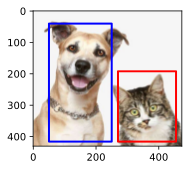

In [28]:
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), 
                             width=bbox[2] - bbox[0],
                             height=bbox[3] - bbox[1], 
                             fill=False,
                             edgecolor=color, linewidth=2)

fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));